[0, 2.1, 2.5, 14]

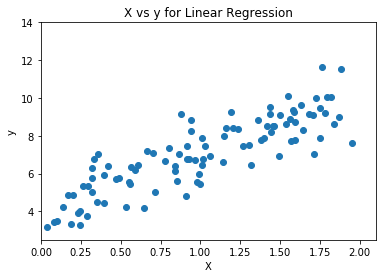

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('X')
plt.title('X vs y for Linear Regression')
plt.axis([0, 2.1, 2.5, 14])


### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

The function that we used to generate the data is y = 4 + 3x<sub>1</sub> + Gaussian noise. Let’s see what the equation found.

In [18]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.01060949],
       [3.03767124]])

Making predictions using theta_best.

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.01060949],
       [10.08595197]])

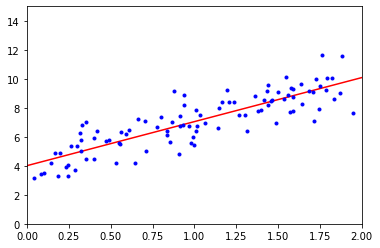

In [26]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([4.01060949]), array([[3.03767124]]))

In [29]:
print(X_new)
lin_reg.predict(X_new)

[[0]
 [2]]


array([[ 4.01060949],
       [10.08595197]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which we could call directly.

In [30]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01060949],
       [3.03767124]])

### Gradient Descent
The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Concretely, we start by filling θ with random values (this is called random initialization). Then we improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

The MSE cost function for a Linear Regression model happens to be a *convex function*, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve.  This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

### Stochastic Gradient Descent using Learning Schedule

In [34]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization
m = 50

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        print(theta)
    

[[0.16159194]
 [1.03544404]]
[[1.05692651]
 [1.80019383]]
[[2.14261792]
 [3.57445012]]
[[2.20738918]
 [3.62060036]]
[[2.08803026]
 [3.41201656]]
[[2.04615204]
 [3.34959176]]
[[2.41098774]
 [3.92540307]]
[[2.67490598]
 [4.19136047]]
[[2.84071362]
 [4.21472325]]
[[2.75643058]
 [4.09131269]]
[[2.78753948]
 [4.09854159]]
[[2.75589918]
 [4.06633597]]
[[2.99163654]
 [4.23259322]]
[[3.09308796]
 [4.24688802]]
[[3.09896808]
 [4.25415042]]
[[2.94901584]
 [4.10238131]]
[[3.05509339]
 [4.11732794]]
[[2.60039499]
 [3.33837153]]
[[2.84339725]
 [3.63849852]]
[[2.75104272]
 [3.46571435]]
[[2.9835455 ]
 [3.70001357]]
[[3.00233704]
 [3.70462638]]
[[3.12013622]
 [3.80637633]]
[[3.29594008]
 [4.13684265]]
[[3.27780678]
 [4.12672242]]
[[3.41093086]
 [4.17974148]]
[[3.33236398]
 [4.05134608]]
[[3.18657019]
 [3.85043462]]
[[3.17291263]
 [3.84708206]]
[[3.10437407]
 [3.8274666 ]]
[[3.14324382]
 [3.89455196]]
[[3.03393341]
 [3.81666707]]
[[2.9816125 ]
 [3.72730585]]
[[3.11815912]
 [3.86490751]]
[[3.02578421]


 [3.1548473 ]]
[[3.65933999]
 [3.15810445]]
[[3.6729532 ]
 [3.16713078]]
[[3.66712654]
 [3.16689255]]
[[3.66238509]
 [3.16579076]]
[[3.65632389]
 [3.15885795]]
[[3.65067117]
 [3.15862683]]
[[3.64559153]
 [3.15027912]]
[[3.63512159]
 [3.1477193 ]]
[[3.61690617]
 [3.11651395]]
[[3.62555859]
 [3.1306539 ]]
[[3.62695559]
 [3.1330399 ]]
[[3.61995891]
 [3.12019592]]
[[3.60238615]
 [3.09009153]]
[[3.60183165]
 [3.08931489]]
[[3.6012928 ]
 [3.08856017]]
[[3.62110424]
 [3.12580062]]
[[3.62965946]
 [3.13746002]]
[[3.63798214]
 [3.14880251]]
[[3.63628812]
 [3.14646807]]
[[3.63877745]
 [3.15011305]]
[[3.63098161]
 [3.14455842]]
[[3.64024248]
 [3.1557148 ]]
[[3.63667737]
 [3.15483966]]
[[3.63734587]
 [3.15521276]]
[[3.63939968]
 [3.15866893]]
[[3.63763717]
 [3.15620032]]
[[3.63342543]
 [3.15577711]]
[[3.62324476]
 [3.153288  ]]
[[3.63271409]
 [3.15705934]]
[[3.64125659]
 [3.17180285]]
[[3.64251901]
 [3.17198073]]
[[3.64425678]
 [3.17490506]]
[[3.64474958]
 [3.17518009]]
[[3.65234932]
 [3.18553733]]

[[3.63997269]
 [3.14533667]]
[[3.64409641]
 [3.14889856]]
[[3.64917275]
 [3.15719441]]
[[3.64560378]
 [3.15704849]]
[[3.64611352]
 [3.15791909]]
[[3.65192645]
 [3.1649218 ]]
[[3.66059407]
 [3.17066893]]
[[3.66585655]
 [3.17975144]]
[[3.66408493]
 [3.17744156]]
[[3.6589034 ]
 [3.16792969]]
[[3.65398462]
 [3.1630395 ]]
[[3.65272056]
 [3.16126904]]
[[3.66431785]
 [3.18306898]]
[[3.66077068]
 [3.17723967]]
[[3.65184099]
 [3.17147048]]
[[3.65048737]
 [3.16960512]]
[[3.64919346]
 [3.16779284]]
[[3.64933829]
 [3.16802346]]
[[3.65527542]
 [3.17038802]]
[[3.66053489]
 [3.17946535]]
[[3.65880925]
 [3.17721541]]
[[3.65104704]
 [3.16365068]]
[[3.65673243]
 [3.17049975]]
[[3.66526367]
 [3.17615645]]
[[3.67115865]
 [3.18209698]]
[[3.67955026]
 [3.18766109]]
[[3.67268583]
 [3.18598278]]
[[3.66810872]
 [3.18207325]]
[[3.6763128 ]
 [3.18551629]]
[[3.67826668]
 [3.18828555]]
[[3.67826595]
 [3.18828431]]
[[3.67884808]
 [3.18836634]]
[[3.67721431]
 [3.18611491]]
[[3.6782199 ]
 [3.18758734]]
[[3.67321689]


 [3.27116578]]
[[3.69190076]
 [3.27105021]]
[[3.68531422]
 [3.25954   ]]
[[3.67734565]
 [3.25227916]]
[[3.67767225]
 [3.25275738]]
[[3.67799426]
 [3.25322888]]
[[3.67866656]
 [3.2542772 ]]
[[3.67856114]
 [3.25421837]]
[[3.67718259]
 [3.25247388]]
[[3.6830799 ]
 [3.25494883]]
[[3.68208604]
 [3.2539372 ]]
[[3.67522023]
 [3.24370284]]
[[3.67196523]
 [3.23997978]]
[[3.67489111]
 [3.2447613 ]]
[[3.66861036]
 [3.23378548]]
[[3.66592019]
 [3.23367549]]
[[3.66296349]
 [3.22881655]]
[[3.66273054]
 [3.22841868]]
[[3.65613272]
 [3.21858378]]
[[3.65234566]
 [3.21481874]]
[[3.65838999]
 [3.21735539]]
[[3.65553142]
 [3.21200735]]
[[3.66156193]
 [3.2145382 ]]
[[3.65871484]
 [3.20921164]]
[[3.65374625]
 [3.20799686]]
[[3.6576642 ]
 [3.21271674]]
[[3.65007624]
 [3.20580269]]
[[3.64713617]
 [3.20243984]]
[[3.65041291]
 [3.20779476]]
[[3.65368766]
 [3.21183933]]
[[3.65362005]
 [3.21172385]]
[[3.65974474]
 [3.21578487]]
[[3.65571165]
 [3.20838122]]
[[3.64817169]
 [3.20151092]]
[[3.65179812]
 [3.2077698 ]]

In [33]:
theta

array([[3.6229607],
       [3.20177  ]])